In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the data
data = pd.read_excel('heartproj.xls')

In [3]:
#data
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#removing duplicate values
final_data = data.drop_duplicates(keep = 'first')

In [5]:
final_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
#The cleveland based dataset is already categoricaly handled with numerically coded values

In [7]:
categorical = []
continous = []
for column in final_data.columns:
    if len(final_data[column].unique()) <= 10:
        categorical.append(column)
    else:
        continous.append(column)
print(categorical)
print(continous)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Analysis of the data


In [8]:
final_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:

final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


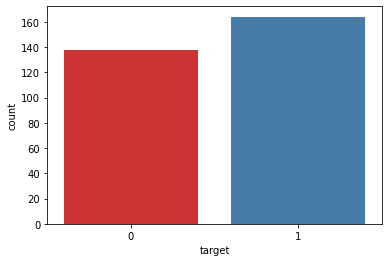

In [10]:
sns.countplot(x="target", data=final_data, palette="Set1")
plt.show()

In [11]:
# the above graph shows that the amount of people who have heart disease are more and the people who have no heart disease are less in the dataset.

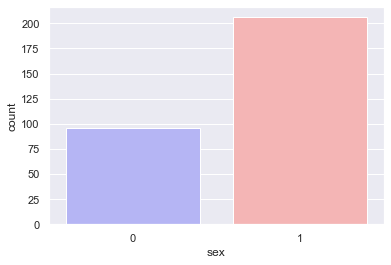

In [12]:
sns.set(style="darkgrid")
sns.countplot(x="sex", data=final_data, palette="bwr")
plt.show()

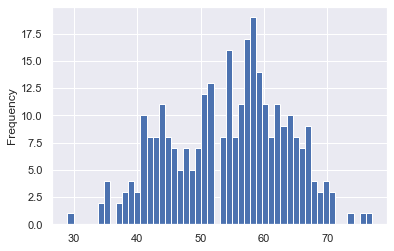

In [13]:
data.age.plot(kind = 'hist', bins = 50)
plt.show()

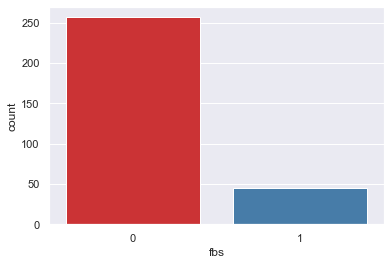

In [14]:
sns.set(style="darkgrid")
sns.countplot(x="fbs", data=final_data, palette="Set1")
plt.show()

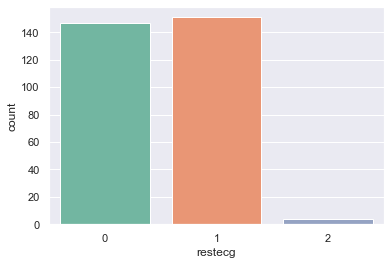

In [15]:
sns.set(style="darkgrid")
sns.countplot(x="restecg", data=final_data, palette="Set2")
plt.show()

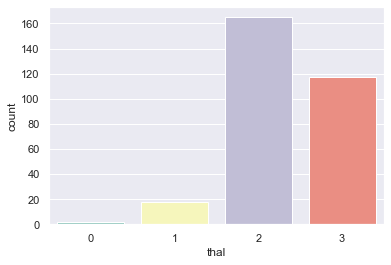

In [16]:
sns.set(style="darkgrid")
sns.countplot(x="thal", data=final_data, palette="Set3")
plt.show()

# Bivariate Analysis

[Text(0.5, 0, 'Sex(0=Female,1=Male)'), Text(0, 0.5, 'Heart disease frequency')]

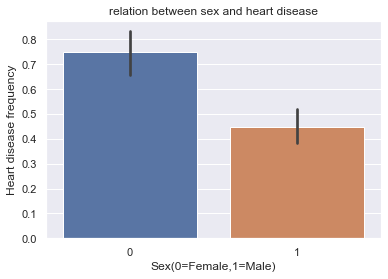

In [17]:

sns.set(style="darkgrid")
ct=sns.barplot(x=final_data.sex,y=final_data.target)
plt.title('relation between sex and heart disease')
ct.set(xlabel="Sex(0=Female,1=Male)", ylabel = "Heart disease frequency")

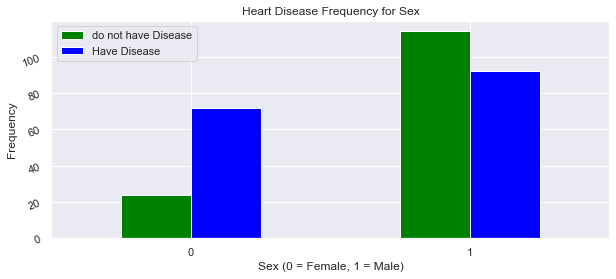

In [18]:

ct = pd.crosstab(final_data.sex,final_data.target)
ct.plot(kind="bar",figsize=(10,4),color=['green','blue' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.yticks(rotation=20)
plt.legend(["do not have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

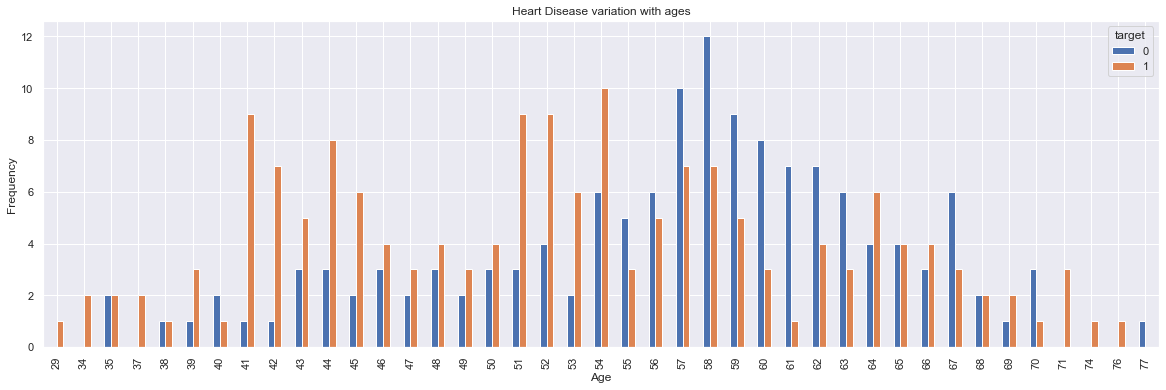

In [19]:
ct=pd.crosstab(final_data.age,final_data.target)
ct.plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease variation with ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

[Text(0.5, 0, 'Electrocardiographic meas'),
 Text(0, 0.5, 'Heart disease Diagnosis')]

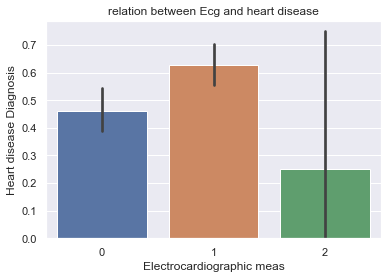

In [20]:
sns.set(style="darkgrid")
ct=sns.barplot(x=final_data.restecg,y=final_data.target)
plt.title('relation between Ecg and heart disease')
ct.set(xlabel="Electrocardiographic meas", ylabel = "Heart disease Diagnosis")


[Text(0.5, 0, 'Chest pain type'), Text(0, 0.5, 'Heart disease Diagnosis')]

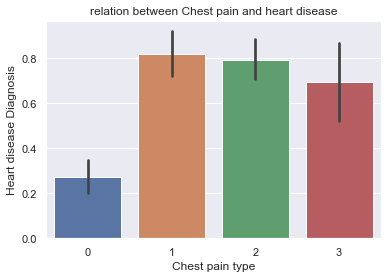

In [21]:
sns.set(style="darkgrid")
ct=sns.barplot(x=final_data.cp,y=final_data.target)
plt.title('relation between Chest pain and heart disease')
ct.set(xlabel="Chest pain type", ylabel = "Heart disease Diagnosis")

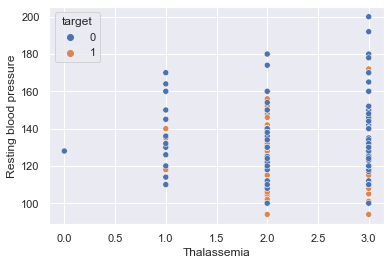

In [22]:

sns.scatterplot(x='thal',y='trestbps',data=final_data,hue='target')
plt.xlabel('Thalassemia')
plt.ylabel('Resting blood pressure')
plt.show()

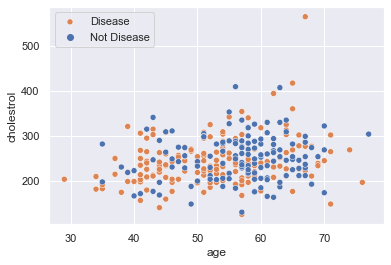

In [23]:

sns.scatterplot(x='age',y='chol',data=final_data,hue='target')
plt.legend(["Disease", "Not Disease"])
plt.xlabel('age')
plt.ylabel('cholestrol')
plt.show()

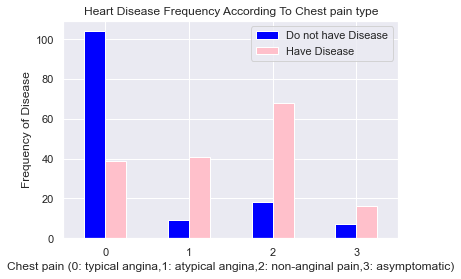

In [24]:
ct=pd.crosstab(final_data.cp,final_data.target)
ct.plot(kind="bar",color=['blue','pink'])
plt.title('Heart Disease Frequency According To Chest pain type')
plt.xlabel('Chest pain (0: typical angina,1: atypical angina,2: non-anginal pain,3: asymptomatic)')
plt.xticks(rotation = 0)
plt.legend(["Do not have Disease", "Have Disease"])
plt.ylabel('Frequency of Disease')
plt.show()

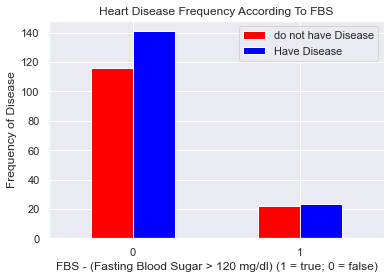

In [25]:
ct=pd.crosstab(final_data.fbs,final_data.target)
ct.plot(kind="bar",color=['red','blue' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["do not have Disease", "Have Disease"])
plt.ylabel('Frequency of Disease')
plt.show()

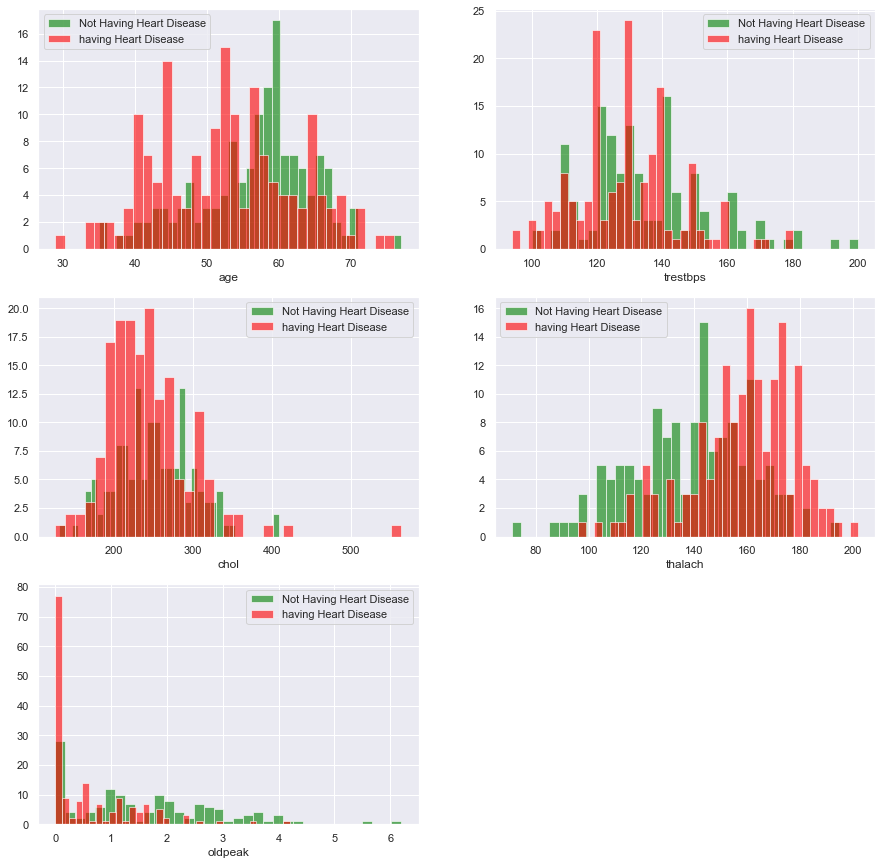

In [26]:
#all continous values ananlysis
plt.figure(figsize=(15, 15))

for i, col in enumerate(continous, 1):
    plt.subplot(3, 2, i)
    final_data[final_data["target"] == 0][col].hist(bins=35, color='green', label='Not Having Heart Disease', alpha=0.6)
    final_data[final_data["target"] == 1][col].hist(bins=35, color='red', label='having Heart Disease', alpha=0.6)
    plt.legend()
    plt.xlabel(col)

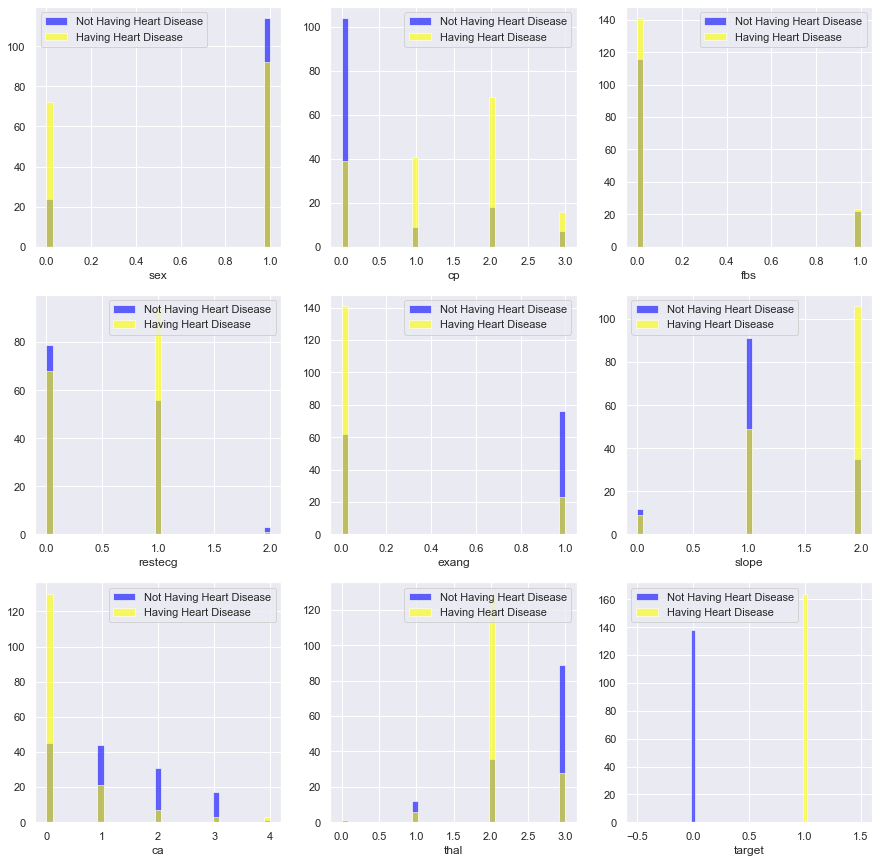

In [27]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(categorical, 1):
    plt.subplot(3, 3, i)
    final_data[final_data["target"] == 0][col].hist(bins=35, color='blue', label='Not Having Heart Disease', alpha=0.6)
    final_data[final_data["target"] == 1][col].hist(bins=35, color='yellow', label='Having Heart Disease', alpha=0.6)
    plt.legend()
    plt.xlabel(col)

## Analyzing Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2bb65611550>,
 'caps': [<matplotlib.lines.Line2D at 0x2bb65611c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bb656111f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bb65a06310>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bb65a06670>],
 'means': []}

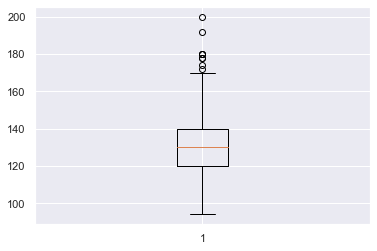

In [28]:
plt.boxplot(final_data['trestbps'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2bb6569bcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bb656213d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bb6569b970>],
 'medians': [<matplotlib.lines.Line2D at 0x2bb65621a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bb65621df0>],
 'means': []}

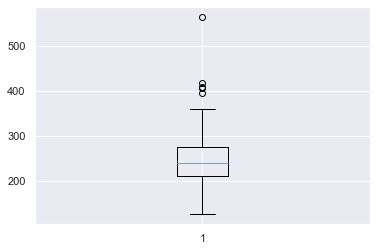

In [29]:
plt.boxplot(final_data['chol'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2bb65a90df0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bb65a634f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bb65a90a90>],
 'medians': [<matplotlib.lines.Line2D at 0x2bb65a63bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bb65a63eb0>],
 'means': []}

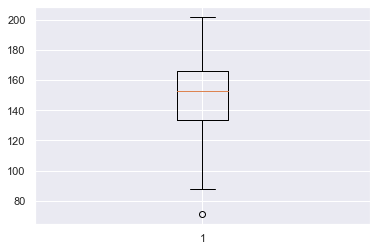

In [30]:

plt.boxplot(final_data['thalach'])

## Removing outliers 

In [31]:
def drop_by_std(dataf, factor):
    
    lower =dataf['trestbps'].mean() - dataf['trestbps'].std() * factor
    upper =dataf['trestbps'].mean() + dataf['trestbps'].std() * factor   
    print(f'Lower: {lower}', f'Upper: {upper}')
    output=dataf[(dataf['trestbps'] < upper) & (dataf['trestbps'] > lower)]
    return output

df = drop_by_std(final_data, 2)
df

Lower: 96.47586054654741 Upper: 166.72943746669765


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


{'whiskers': [<matplotlib.lines.Line2D at 0x2bb65fbb880>,
 'caps': [<matplotlib.lines.Line2D at 0x2bb65fbbf40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bb65fbb520>],
 'medians': [<matplotlib.lines.Line2D at 0x2bb66842640>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bb668429a0>],
 'means': []}

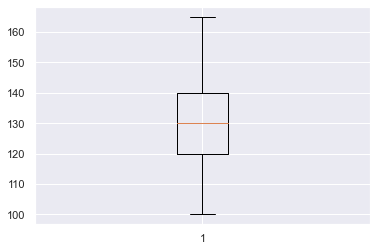

In [32]:
plt.boxplot(df['trestbps'])